<a href="https://colab.research.google.com/github/Rioba-Ian/Deep_Learning/blob/main/Regularization_and_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization 

Regularization is a technique which involves making slight modifications to the learning algorithm  such that the model generalizes better. This in turn will improve the model's perfromance on the unseen test data set as well. 
<br>
Adding more than required layers adds to overfitting in the model. 
<br>
Regularization isn't a quick concept that needs to be mastered, but rather slowly. 
<br>
We add regularization in the neural network by doing the following
> model.add(Dense(256, activation='relu', kernel_regularizer= 'l2'))

# Dropouts 
Dropout is a regularization method approximating training a large number of neural networks with different architechtures in parallel. It is preferred when training a large neural network. 

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png',
      width = 800, height=500)

By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections.

Dropout has the effect of making the training process, noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs. This conceptualization suggests that perhaps droupout breaks-up situations where network layers co-adapt to correct mistakes form prior layers, in turn making the model more robust.
<br>

It can be used with most types of layers, such as dense fully connected layers, convolution layers, and recurrent layers such as the LSTM layer. Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. 
<br>

It is not used in the output layer.

In [2]:
from tensorflow.keras.datasets import mnist
# import matplotlib 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


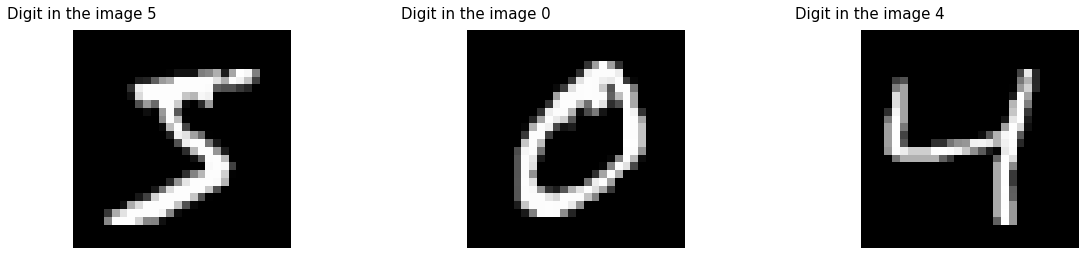

In [4]:
images = X_train[:3]
labels = y_train[:3]

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

for index,(img, ax) in enumerate(zip(images, ax)):
    
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.text(0.6, -2.0, f"Digit in the image {labels[index]}", size=15, ha='center')
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import TensorBoard 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from datetime import datetime

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784, )))
model.add(Dropout(0.2)) #adding dropout
model.add(Dense(256, activation='relu', kernel_regularizer='l2')) # using regulaizer
model.add(Dropout(0.2)) #adding dropout
model.add(Dense(256, activation='relu', kernel_regularizer='l2')) # using regulaizer
model.add(Dropout(0.2)) #using dropout
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
logdir = 'logs/' + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [13]:
training_history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    verbose=1,
    epochs=10,
    validation_data = (X_test, y_test),
    callbacks=[tensorboard_callback, es],
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.5652 - accuracy: 0.2257 - val_loss: 0.8727 - val_accuracy: 0.7149
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1198 - accuracy: 0.6038 - val_loss: 0.6897 - val_accuracy: 0.7700
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9798 - accuracy: 0.6513 - val_loss: 0.6211 - val_accuracy: 0.7848
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8995 - accuracy: 0.6930 - val_loss: 0.6238 - val_accuracy: 0.8196
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8678 - accuracy: 0.7089 - val_loss: 0.6113 - val_accuracy: 0.8543
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8423 - accuracy: 0.7391 - val_loss: 0.5719 - val_accuracy: 0.8549
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8289 - accuracy: 0.7485 - val_loss: 0.5759 - val_accuracy:

In most cases, dropouts is used in deep/wide neural networks. This is a very basic one. The training will require more epochs to train. 

## Why not just use early stopping rather than regularization?
The main downside of earlystopping is that this couples two tasks:
1. Algorithm to optimize the cost function
2. Prevent overfitting
<br>

because by stopping gradient descent early, we are sort of breaking whatever we are building through optimization in the cost function and simultaneously trying not to over fit. Rather than using early stopping, one alternative is the L2 regularization then we can just train the neural network as long as possible - another drawback would be that we would try out different values for the lamda regularization parameter to obtain a really good one. 

**Points to conclude**
* Large weights in a neural network are a sign of a more complex network needed to fit which may lead to overfitting the training data.
* Probabilistically dropping out nodes in the network is a simple and effecting regularization method. 
* A large network with more training and the use of a weight constraint are suggested when using the dropout